In [23]:
import pandas as pd
import plotly.graph_objects as go
from ipywidgets import widgets
import json
from IPython.display import display
import geopy.distance

In [24]:
pd.set_option("display.max_columns", 500)

In [25]:
df = pd.read_csv('../raw_data/listings.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning:

Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.



# Data Prep

In [26]:
df.shape

(65493, 106)

In [27]:
df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,33065009,https://www.airbnb.com/rooms/33065009,20191107231022,2019-11-08,Beautiful apartment center of Paris with terrace,Very well located apartment in the heart of Pa...,4th floor apartment without elevator with air ...,Very well located apartment in the heart of Pa...,none,This apartment is located in the center of Par...,The entrance to the apartment can be done from...,Metro lines 8/9 Bonne Nouvelle at 149m Métro l...,Travelers have access to the entire apartment.,An explanatory guide on the apartment is at yo...,Toute arrivée tardive entrainera des frais sup...,NaN,NaN,https://a0.muscache.com/im/pictures/494e4c7f-f...,NaN,28313443,https://www.airbnb.com/users/show/28313443,Michael & Johanna,2015-02-24,"Paris, Île-de-France, France",Nous nous appelons Michael et Johanna\r\nNous...,within an hour,99%,NaN,f,https://a0.muscache.com/im/users/28313443/prof...,https://a0.muscache.com/im/users/28313443/prof...,Tour Eiffel - Champ de Mars,72.0,72.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Paris, Île-de-France, France",II Arrondissement,Bourse,NaN,Paris,Île-de-France,75002,Paris,"Paris, France",FR,France,48.86847,2.35209,t,Apartment,Entire home/apt,8,2.0,3.0,4.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,$256.00,NaN,NaN,$0.00,$95.00,6,$30.00,2,1125,1,3,1125,1125,2.9,1125.0,yesterday,t,9,16,27,284,2019-11-08,29,29,2019-04-12,2019-11-03,94.0,10.0,10.0,10.0,10.0,9.0,9.0,t,7510203193509,"{""translation missing: en.occupancy.taxes.juri...",t,f,strict_14_with_grace_period,f,f,73,72,0,0,4.12
1,33008241,https://www.airbnb.com/rooms/33008241,20191107231022,2019-11-08,Magnificent apt located in the heart of Paris,Beautiful apartment of 22 square meters locate...,The accommodation is fully equipped and will p...,Beautiful apartment of 22 square meters locate...,none,NaN,NaN,Arts et Métiers metro 3 and 11 at 2min walking...,Only guests will have access to the apartment ...,To make your stay even better during my absenc...,Please do not make noise after 10 pm. When req...,NaN,NaN,https://a0.muscache.com/im/pictures/0e3ab02a-d...,NaN,248419822,https://www.airbnb.com/users/show/248419822,Mickael,2019-03-12,"Paris, Île-de-France, France","Bonjour, \r\n\r\nJe m’appelle Mickael et j’hab...",within an h

In [28]:
cols_to_keep = ['id', 'host_id', 'host_is_superhost', 
                'host_listings_count', 'host_has_profile_pic', 'neighbourhood_cleansed', 'zipcode',
                'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 
                'bedrooms', 'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee', 
                'minimum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 
                'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                'review_scores_location', 'review_scores_value', 'reviews_per_month']

df = df[cols_to_keep]

# Dealing with missing data

In [30]:
len(df)

65493

In [34]:
df['host_is_superhost'].fillna('f', inplace=True)
df['host_listings_count'].fillna(1, inplace=True)
df['host_has_profile_pic'].fillna('f', inplace=True)
df['zipcode'].fillna(-99999, inplace=True)
df['bathrooms'].fillna(1, inplace=True)
df['bedrooms'].fillna(1, inplace=True)
df['beds'].fillna(1, inplace=True)
df['security_deposit'].fillna(-99999, inplace=True)
df['cleaning_fee'].fillna(-99999, inplace=True)
df['review_scores_rating'].fillna(-99999, inplace=True)
df['review_scores_accuracy'].fillna(-99999, inplace=True)
df['review_scores_cleanliness'].fillna(-99999, inplace=True)
df['review_scores_checkin'].fillna(-99999, inplace=True)
df['review_scores_communication'].fillna(-99999, inplace=True)
df['review_scores_location'].fillna(-99999, inplace=True)
df['review_scores_value'].fillna(-99999, inplace=True)
df['reviews_per_month'].fillna(-99999, inplace=True)

In [35]:
df.isnull().sum()

id                             0
host_id                        0
host_is_superhost              0
host_listings_count            0
host_has_profile_pic           0
neighbourhood_cleansed         0
zipcode                        0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
bed_type                       0
price                          0
security_deposit               0
cleaning_fee                   0
minimum_nights                 0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

# Encoding categorical features

In [52]:
df['host_is_superhost'] = df['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)
df['host_has_profile_pic'] = df['host_has_profile_pic'].apply(lambda x: 1 if x == 't' else 0)
del df['zipcode']
df['neighbourhood_cleansed'] = pd.Categorical(df['neighbourhood_cleansed'])
df['property_type'] = pd.Categorical(df['property_type'])
df['room_type'] = pd.Categorical(df['room_type'])
df['bed_type'] = pd.Categorical(df['bed_type'])
df['price'] = df['price'].apply(lambda x: float(x.replace('$', '').replace(',', '')))
df['security_deposit'] = df['security_deposit'].astype('str')
df['cleaning_fee'] = df['cleaning_fee'].astype('str')
df['security_deposit'] = df['security_deposit'].apply(lambda x: float(x.replace('$', '').replace(',', '')))
df['cleaning_fee'] = df['cleaning_fee'].apply(lambda x: float(x.replace('$', '').replace(',', '')))

In [60]:
df['bed_type'] = df['bed_type'].apply(lambda x: 1 if x == 'Real Bed' else 0)

In [63]:
df['property_type'] = df['property_type'].apply(lambda x: 1 if x == 'Apartment' else 0)

In [57]:
df_neighbour = pd.get_dummies(df['neighbourhood_cleansed'], prefix='neighbour')
df_room = pd.get_dummies(df['room_type'], prefix='room')

In [66]:
del df['neighbourhood_cleansed']
del df['room_type']

In [67]:
df = pd.concat([df, df_neighbour, df_room], axis=1)

# calculating distance from Paris centre

In [54]:
paris_centre_lat = 48.860642
paris_centre_lon = 2.352245
paris_centre = (paris_centre_lat, paris_centre_lon)

In [55]:
df['dist_from_centre'] = df[['latitude', 'longitude']].apply(lambda x: geopy.distance.distance((x['latitude'], x['longitude']), paris_centre).km, axis=1)



# Basic ML

In [85]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np

In [93]:
target_col = 'price'
input_cols = df.columns.tolist()
input_cols.remove('price')
input_cols.remove('id')
input_cols.remove('host_id')
input_cols.remove('latitude'),
input_cols.remove('longitude')

In [94]:
model = GradientBoostingRegressor(random_state=42, n_estimators=200, max_depth=5)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(df[input_cols], df[target_col], test_size=0.2, random_state=42)

In [96]:
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [97]:
X_test['pred'] = model.predict(X_test[input_cols])
X_test['true'] = y_test

In [98]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [99]:
mean_absolute_percentage_error(X_test['true'], X_test['pred'])

37.4914262673687

In [100]:
df_importances = pd.DataFrame(data=model.feature_importances_, columns=['importances'], index=input_cols)

In [101]:
df_importances.sort_values(by='importances', ascending=False)

,importances
host_listings_count,0.344712
dist_from_centre,0.097738
bathrooms,0.092553
security_deposit,0.066100
cleaning_fee,0.060461
minimum_nights,0.056704
accommodates,0.049302
room_Hotel room,0.032253
property_type,0.027264
reviews_per_month,0.027176


# RandomForest

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
rf = RandomForestRegressor(random_state=42, n_estimators=200, n_jobs=2)

In [106]:
rf.fit(X_train[input_cols], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=2,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [108]:
X_test['pred'] = rf.predict(X_test[input_cols])
X_test['true'] = y_test

In [109]:
mean_absolute_percentage_error(X_test['true'], X_test['pred'])

37.25691811375293

# Model optimizing

In [110]:
params = {'n_estimators': [100, 200, 300, 400],
          'max_depth': [5, 7, 10]}

In [111]:
from sklearn.model_selection import GridSearchCV

In [113]:
gbm = GradientBoostingRegressor()

In [118]:
opt = GridSearchCV(estimator=gbm, param_grid=params, n_jobs=2)

In [ ]:
opt.fit(df[input_cols], df[target_col])

In [146]:
gbm_1 = GradientBoostingRegressor(n_estimators=400, random_state=42, max_depth=7)

In [147]:
gbm_1.fit(X_train[input_cols], y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=7, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [122]:
X_test['pred'] = gbm_1.predict(X_test[input_cols])
X_test['true'] = y_test

In [123]:
mean_absolute_percentage_error(X_test['true'], X_test['pred'])

36.55934356911613

In [125]:
df_importances_1 = pd.DataFrame(data=model.feature_importances_, columns=['importances'], index=input_cols)

In [136]:
df_importances_1.sort_values(by='importances', ascending=False)

,importances
host_listings_count,0.344712
dist_from_centre,0.097738
bathrooms,0.092553
security_deposit,0.066100
cleaning_fee,0.060461
minimum_nights,0.056704
accommodates,0.049302
room_Hotel room,0.032253
property_type,0.027264
reviews_per_month,0.027176


# Partial Dependency Plots

In [143]:
dist_range = [x for x in range(100, 4001, 100)]

In [150]:
config = {}
for dst in dist_range:
    temp_df = df.copy()
    temp_df['dist_from_centre'] = dst / 1000
    temp_df['pred'] = gbm_1.predict(temp_df[input_cols])
    temp_df['diff'] = temp_df['pred'] - temp_df[target_col]
    config[dst] = temp_df['diff'].mean()

In [203]:
exp_range = [x for x in range(1,15,1)]
exp_data = {}
for exp in exp_range:
    temp_df = df.copy()
    temp_df['host_listings_count'] = exp
    temp_df['pred'] = gbm_1.predict(temp_df[input_cols])
    temp_df['diff'] = temp_df['pred'] - temp_df[target_col]
    exp_data[exp] = temp_df['diff'].mean()

# Matplotlib visual

In [205]:
import matplotlib.pyplot as plt

In [206]:
df_plot = pd.DataFrame(data=config.values(), columns=['values'], index=config.keys())

In [207]:
df_plot2 = pd.DataFrame(data=exp_data.values(), columns=['values'], index=exp_data.keys())

Text(0, 0.5, 'Avg. price difference in $')

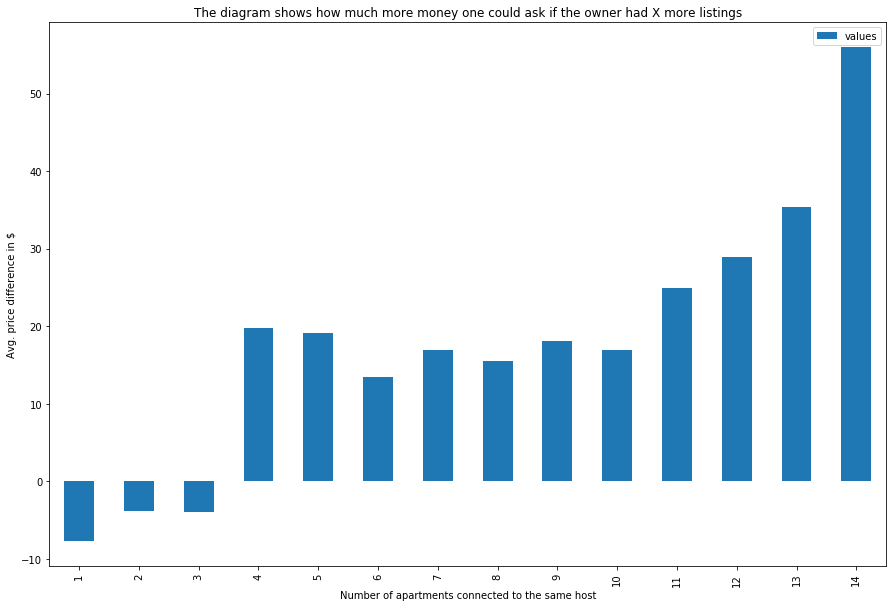

In [208]:
df_plot2.plot(kind='bar', figsize=(15,10))
plt.title('The diagram shows how much more money one could ask if the owner had X more listings')
plt.xlabel('Number of apartments connected to the same host')
plt.ylabel('Avg. price difference in $')

Text(0, 0.5, 'Avg. price difference in $')

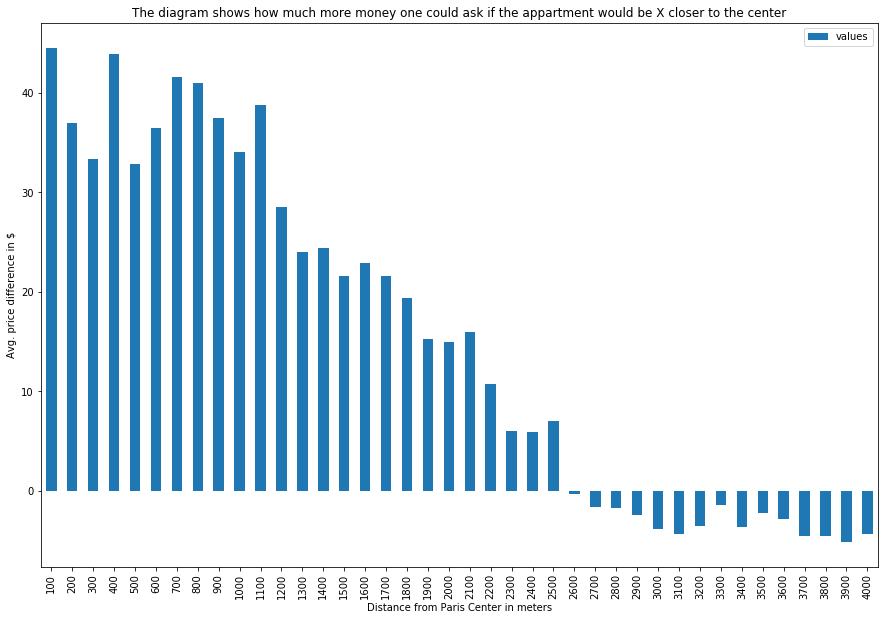

In [174]:
df_plot.plot(kind='bar', figsize=(15,10))
plt.title('The diagram shows how much more money one could ask if the appartment would be X closer to the center')
plt.xlabel('Distance from Paris Center in meters')
plt.ylabel('Avg. price difference in $')

In [199]:
df.to_csv('../generated_data/listings_calc.csv', index=False)